# Dataset Overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_parquet("color_pedia.parquet")
dataset.head()

,Color Name,HEX Code,Category,Description,Emotion,Personality,Mood,Symbolism,Use Case,Keywords,R,G,B,Hue,Saturation,Lightness,Contrast Level
0,Deep Maroon,#D62559,Red Family (Ruby Red),A vibrant and deep shade of maroon.,"Passionate, Intense","Bold, Dramatic","Strong, Powerful","Deep Maroon often symbolizes power, strength, ...",Ideal for creating a striking impact in design...,"Powerful, Passionate, Bold, Deep, Strong, Inte...",214,37,89,342.37,70.52,49.22,Dark
1,Golden Brick,#E5B262,"Warm, Earthy",A warm and inviting shade of golden brown.,"Comfort, Warmth, Optimism","Reliable, Friendly, Approachable","Cozy, Sunlit, Nurturing","Growth, Stability, Harvest",Ideal for creating a warm and inviting atmosph...,"Warm, Golden, Brown, Earthy, Comfortable, Cozy...",229,178,98,36.64,71.58,64.12,Dark
2,Lime Green,#8CCD48,"Bright, Vibrant",A lively shade of green with yellow undertones.,"Energetic, Fresh","Outgoing, Adventurous","Playful, Exciting","Growth, Renewal, Envy (in some cultures)","Ideal for modern design elements, branding for...","Bright, Vibrant, Fresh, Energy, Nature, Green,...",140,205,72,89.32,57.08,54.31,Dark
3,Sage Green #356A40,#356A40,Green,"A rich, muted green shade with a hint of blue.",Calmness and Relaxation,"Stable and reliable, like an old friend.",Serene and earthy.,"Growth, harmony, and balance in nature.",Ideal for spaces promoting relaxation and tran...,"Calm, Earthy, Nature, Reliable, Stable.",53,106,64,132.45,33.33,31.18,Dark
4,Deep Sapphire Blue,#0618DE,"Dark, Intense","A vibrant and rich shade of blue, reminiscent ...","Serene, Luxurious","Majestic, Mysterious","Calm, Elegant","Deep Sapphire Blue often symbolizes wisdom, lo...","Ideal for branding luxury items, technology, o...","Luxurious, Deep, Ocean, Premium, Elegant, Myst...",6,24,222,235.00,94.74,44.71,Dark


In [3]:
dataset.shape, dataset.size

((100000, 17), 1700000)

In [4]:
dataset.isnull().sum()

Color Name        0
HEX Code          0
Category          0
Description       1
Emotion           0
Personality       6
Mood              0
Symbolism         0
Use Case          0
Keywords          2
R                 0
G                 0
B                 0
Hue               0
Saturation        0
Lightness         0
Contrast Level    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Color Name      100000 non-null  object 
 1   HEX Code        100000 non-null  object 
 2   Category        100000 non-null  object 
 3   Description     99999 non-null   object 
 4   Emotion         100000 non-null  object 
 5   Personality     99994 non-null   object 
 6   Mood            100000 non-null  object 
 7   Symbolism       100000 non-null  object 
 8   Use Case        100000 non-null  object 
 9   Keywords        99998 non-null   object 
 10  R               100000 non-null  int64  
 11  G               100000 non-null  int64  
 12  B               100000 non-null  int64  
 13  Hue             100000 non-null  float64
 14  Saturation      100000 non-null  float64
 15  Lightness       100000 non-null  float64
 16  Contrast Level  100000 non-null  object 
dtypes: float64(

In [6]:
dataset.describe()

,R,G,B,Hue,Saturation,Lightness
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,127.63905,127.432440,127.673510,179.755095,66.894212,50.006995
std,73.88771,73.897411,73.852679,103.960132,23.807429,15.904531
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.780000
25%,64.00000,63.000000,64.000000,89.580000,50.000000,39.610000
50%,128.00000,127.000000,128.000000,180.000000,70.945000,50.000000
75%,192.00000,191.000000,191.000000,269.800000,86.980000,60.390000
max,255.00000,255.000000,255.000000,359.740000,100.000000,99.800000


# Dataset Visualization

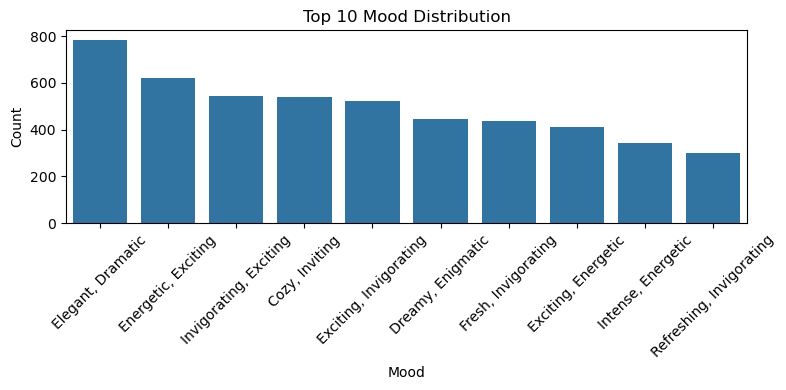

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(
    data=dataset,
    x="Mood",
    order=dataset["Mood"].value_counts().head(10).index
)
plt.title("Top 10 Mood Distribution")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
x = dataset["Mood"]
y = dataset[["R", "G", "B"]] / 255

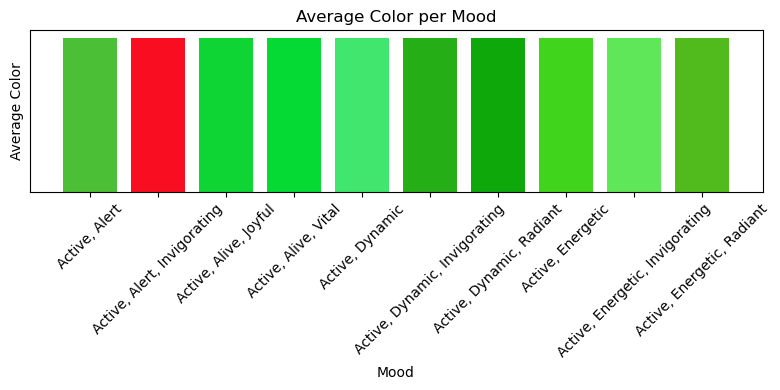

In [9]:
avg_colors = (dataset.dropna(subset=["Mood", "R", "G", "B"]).groupby("Mood")[["R", "G", "B"]].mean().head(10))

colors = avg_colors.values / 255.0
plt.figure(figsize=(8, 4))
plt.bar(avg_colors.index, [1]*len(avg_colors), color=colors)
plt.title("Average Color per Mood")
plt.xlabel("Mood")
plt.ylabel("Average Color")
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()
plt.show()


# Dataset Preprocessing

In [10]:
import regex as re
def clean_mood(text):
    text = str(text).lower().strip()
    text = re.sub(r'[^a-z0-9\s]+', " ", text)
    text = re.sub(r'\s', " ", text)
    return text.strip()

In [11]:
dataset["Mood"] = dataset["Mood"].apply(clean_mood)
dataset.head()

,Color Name,HEX Code,Category,Description,Emotion,Personality,Mood,Symbolism,Use Case,Keywords,R,G,B,Hue,Saturation,Lightness,Contrast Level
0,Deep Maroon,#D62559,Red Family (Ruby Red),A vibrant and deep shade of maroon.,"Passionate, Intense","Bold, Dramatic",strong powerful,"Deep Maroon often symbolizes power, strength, ...",Ideal for creating a striking impact in design...,"Powerful, Passionate, Bold, Deep, Strong, Inte...",214,37,89,342.37,70.52,49.22,Dark
1,Golden Brick,#E5B262,"Warm, Earthy",A warm and inviting shade of golden brown.,"Comfort, Warmth, Optimism","Reliable, Friendly, Approachable",cozy sunlit nurturing,"Growth, Stability, Harvest",Ideal for creating a warm and inviting atmosph...,"Warm, Golden, Brown, Earthy, Comfortable, Cozy...",229,178,98,36.64,71.58,64.12,Dark
2,Lime Green,#8CCD48,"Bright, Vibrant",A lively shade of green with yellow undertones.,"Energetic, Fresh","Outgoing, Adventurous",playful exciting,"Growth, Renewal, Envy (in some cultures)","Ideal for modern design elements, branding for...","Bright, Vibrant, Fresh, Energy, Nature, Green,...",140,205,72,89.32,57.08,54.31,Dark
3,Sage Green #356A40,#356A40,Green,"A rich, muted green shade with a hint of blue.",Calmness and Relaxation,"Stable and reliable, like an old friend.",serene and earthy,"Growth, harmony, and balance in nature.",Ideal for spaces promoting relaxation and tran...,"Calm, Earthy, Nature, Reliable, Stable.",53,106,64,132.45,33.33,31.18,Dark
4,Deep Sapphire Blue,#0618DE,"Dark, Intense","A vibrant and rich shade of blue, reminiscent ...","Serene, Luxurious","Majestic, Mysterious",calm elegant,"Deep Sapphire Blue often symbolizes wisdom, lo...","Ideal for branding luxury items, technology, o...","Luxurious, Deep, Ocean, Premium, Elegant, Myst...",6,24,222,235.00,94.74,44.71,Dark


# Train Test split

In [12]:
x = dataset["Mood"]
y = dataset[["R", "G", "B"]]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vec = TfidfVectorizer(ngram_range=(1, 2))
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)

# Model Training in Default parameter

In [17]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor

In [18]:
svm = MultiOutputRegressor(LinearSVR(random_state=42))
svm.fit(x_train, y_train)

MultiOutputRegressor(estimator=LinearSVR(random_state=42))

In [19]:
svm.score(x_test, y_test), svm.score(x_train, y_train)

(0.49113550707789316, 0.4983193368787518)

In [20]:
y_pred = svm.predict(x_test)
y_pred

array([[113.83107192,  30.60700664, 158.33642724],
       [139.01185045, 125.38982754, 143.80576282],
       [137.79673225, 111.91842739, 111.02192693],
       ...,
       [216.34439836, 214.39304732,  54.68567466],
       [134.24894758, 138.91739302, 122.08195205],
       [184.08895136,  43.28183578,  93.23957641]])

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
r2_overall = r2_score(y_test, y_pred, multioutput="uniform_average")
mae_overall = mean_absolute_error(y_test, y_pred, multioutput="uniform_average")
mse_overall = mean_squared_error(y_test, y_pred, multioutput="uniform_average")
rmse_overall = np.sqrt(mse_overall)

print("R2  :", r2_overall)
print("MAE :", mae_overall)
print("MSE :", mse_overall)
print("RMSE:", rmse_overall)

R2  : 0.49113550707789316
MAE : 42.068164108980746
MSE : 2779.0612195322706
RMSE: 52.71680206093946


In [23]:
r2_rgb = r2_score(y_test, y_pred, multioutput="raw_values")
mae_rgb = mean_absolute_error(y_test, y_pred, multioutput="raw_values")
mse_rgb = mean_squared_error(y_test, y_pred, multioutput="raw_values")
rmse_rgb = np.sqrt(mse_rgb)

print("R2   [R,G,B]:", r2_rgb)
print("MAE  [R,G,B]:", mae_rgb)
print("MSE  [R,G,B]:", mse_rgb)
print("RMSE [R,G,B]:", rmse_rgb)

R2   [R,G,B]: [0.40869237 0.62519144 0.43952271]
MAE  [R,G,B]: [46.01546104 35.66030647 44.52872481]
MSE  [R,G,B]: [3265.24350659 2035.07941644 3036.86073556]
RMSE [R,G,B]: [57.14230925 45.1118545  55.10771938]


# Hyper parameter Tuning (GridSearchCV)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param = {
    "estimator__C": [0.1, 1.0, 10.0, 100.0],
    "estimator__epsilon": [0.0, 0.05, 0.1, 0.2],
    "estimator__loss": ["epsilon_insensitive", "squared_epsilon_insensitive"],
    "estimator__tol": [1e-4, 1e-3],
    "estimator__max_iter": [2000, 5000],
    "estimator__fit_intercept": [True, False],
    "estimator__dual": [True, False]
}


In [26]:
param = {
    "estimator__epsilon": [0.0, 0.05, 0.1, 0.2],
    "estimator__loss": ["epsilon_insensitive", "squared_epsilon_insensitive"],
    "estimator__tol": [1e-4, 1e-3],
    "estimator__max_iter": [2000, 5000],
    "estimator__fit_intercept": [True, False],
}

In [27]:
cv = GridSearchCV(estimator=svm, param_grid=param, cv=3, verbose=2)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END estimator__epsilon=0.0, estimator__fit_intercept=True, estimator__loss=epsilon_insensitive, estimator__max_iter=2000, estimator__tol=0.0001; total time=   0.0s
[CV] END estimator__epsilon=0.0, estimator__fit_intercept=True, estimator__loss=epsilon_insensitive, estimator__max_iter=2000, estimator__tol=0.0001; total time=   0.0s
[CV] END estimator__epsilon=0.0, estimator__fit_intercept=True, estimator__loss=epsilon_insensitive, estimator__max_iter=2000, estimator__tol=0.0001; total time=   0.0s
[CV] END estimator__epsilon=0.0, estimator__fit_intercept=True, estimator__loss=epsilon_insensitive, estimator__max_iter=2000, estimator__tol=0.001; total time=   0.0s
[CV] END estimator__epsilon=0.0, estimator__fit_intercept=True, estimator__loss=epsilon_insensitive, estimator__max_iter=2000, estimator__tol=0.001; total time=   0.0s
[CV] END estimator__epsilon=0.0, estimator__fit_intercept=True, estimator__loss=epsilon_insensi

GridSearchCV(cv=3,
             estimator=MultiOutputRegressor(estimator=LinearSVR(random_state=42)),
             param_grid={'estimator__epsilon': [0.0, 0.05, 0.1, 0.2],
                         'estimator__fit_intercept': [True, False],
                         'estimator__loss': ['epsilon_insensitive',
                                             'squared_epsilon_insensitive'],
                         'estimator__max_iter': [2000, 5000],
                         'estimator__tol': [0.0001, 0.001]},
             verbose=2)

In [28]:
print("Best CV Score:", cv.best_score_)
print("Best Params:", cv.best_params_)
print("Best Model:", cv.best_estimator_)

Best CV Score: 0.528970302654364
Best Params: {'estimator__epsilon': 0.05, 'estimator__fit_intercept': True, 'estimator__loss': 'squared_epsilon_insensitive', 'estimator__max_iter': 2000, 'estimator__tol': 0.001}
Best Model: MultiOutputRegressor(estimator=LinearSVR(epsilon=0.05,
                                         loss='squared_epsilon_insensitive',
                                         max_iter=2000, random_state=42,
                                         tol=0.001))


In [29]:
y_cv_pred = cv.best_estimator_.predict(x_test)

In [30]:
r2_overall = r2_score(y_test, y_cv_pred, multioutput="uniform_average")
mae_overall = mean_absolute_error(y_test, y_cv_pred, multioutput="uniform_average")
mse_overall = mean_squared_error(y_test, y_cv_pred, multioutput="uniform_average")
rmse_overall = np.sqrt(mse_overall)

print("R2  :", r2_overall)
print("MAE :", mae_overall)
print("MSE :", mse_overall)
print("RMSE:", rmse_overall)

R2  : 0.5335005973303386
MAE : 39.75301888339694
MSE : 2547.300031262835
RMSE: 50.47078393747055


In [31]:
r2_rgb = r2_score(y_test, y_cv_pred, multioutput="raw_values")
mae_rgb = mean_absolute_error(y_test, y_cv_pred, multioutput="raw_values")
rmse_rgb = np.sqrt(mean_squared_error(y_test, y_cv_pred, multioutput="raw_values"))

print("R2   [R,G,B]:", r2_rgb)
print("MAE  [R,G,B]:", mae_rgb)
print("RMSE [R,G,B]:", rmse_rgb)


R2   [R,G,B]: [0.46920807 0.65706305 0.47423067]
MAE  [R,G,B]: [42.90825696 33.85262867 42.49817101]
RMSE [R,G,B]: [54.13937036 43.15121961 53.37415964]


# Prediction

In [32]:
def svr_predict(mood):
    x_new = vec.transform([mood])
    rgb_pred = svm.predict(x_new)[0]
    rgb_int = np.clip(np.round(rgb_pred), 0, 255).astype(int)

    print("Mood:", mood)
    print("Predicted RGB (float):", rgb_pred)
    print("Predicted RGB (int 0-255):", rgb_int)

In [33]:
mood = "strong powerful"
svr_predict(mood)

Mood: strong powerful
Predicted RGB (float): [134.91631367  35.84066179  84.3986154 ]
Predicted RGB (int 0-255): [135  36  84]


In [34]:
def grid_predict(mood):
    grid = cv.best_estimator_
    x_new = vec.transform([mood])           
    rgb_pred = grid.predict(x_new)[0]         
    rgb_int = np.clip(np.round(rgb_pred), 0, 255).astype(int)

    print("Mood:", mood)
    print("Predicted RGB (float):", rgb_pred)
    print("Predicted RGB (int 0-255):", rgb_int) 

In [35]:
grid_predict("strong powerful")

Mood: strong powerful
Predicted RGB (float): [142.99344504  42.56452032  83.71607053]
Predicted RGB (int 0-255): [143  43  84]
